In [8]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import random

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.902752,-0.066697,1.111513,1.854653,1.590927,0
1,0.261014,1.488834,-0.203946,-0.143773,-1.804542,1
2,1.374704,-0.023916,-1.493533,-1.124045,-1.557422,0
3,0.512056,0.819705,0.035431,-0.563323,0.840380,0
4,-1.916236,2.509987,2.943906,3.078087,3.584562,0


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [9]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [10]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [11]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\ariff\AppData\Local\Temp\ipykernel_29176\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [12]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\ariff\AppData\Local\Temp\ipykernel_29176\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [13]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\ariff\AppData\Local\Temp\ipykernel_29176\3275485051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [14]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col3', 'col5', 'target'], dtype='object')
Index(['col1', 'col5', 'target'], dtype='object')


In [15]:
df3

,col1,col5,target
25,0.441975,-3.368235,1
74,-2.606386,3.653792,0
77,-2.193069,1.851165,0
10,-1.753814,-1.775942,1
2,1.374704,-1.557422,0
1,0.261014,-1.804542,1
52,0.115587,1.028571,0
34,1.587986,0.636016,0
20,-2.057653,0.877149,0
61,-1.972092,-0.991277,0


In [16]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [18]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [19]:
from sklearn.tree import plot_tree

[Text(0.40625, 0.9166666666666666, 'x[0] <= -0.662\ngini = 0.487\nsamples = 50\nvalue = [29.0, 21.0]'),
 Text(0.125, 0.75, 'x[0] <= -1.467\ngini = 0.188\nsamples = 19\nvalue = [2, 17]'),
 Text(0.265625, 0.8333333333333333, 'True  '),
 Text(0.0625, 0.5833333333333334, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.1875, 0.5833333333333334, 'x[0] <= -1.376\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.125, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'x[0] <= -1.041\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.1875, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3125, 0.25, 'x[1] <= -2.093\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.25, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.375, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6875, 0.75, 'x[0] <= 0.224\ngini = 0.225\nsamples = 31\nvalue = [27, 4]'),
 Text(0.546875, 0.8333333333333333,

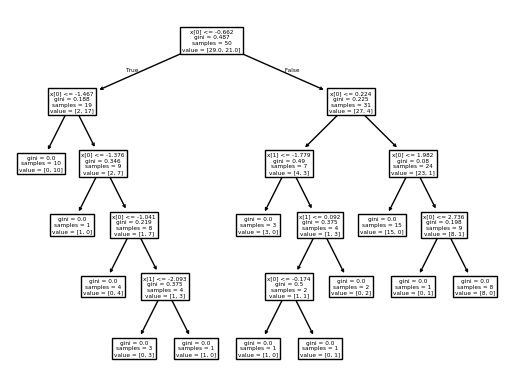

In [20]:
plot_tree(clf1)

[Text(0.2727272727272727, 0.9444444444444444, 'x[1] <= 0.542\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.18181818181818182, 0.8333333333333334, 'x[1] <= -2.456\ngini = 0.327\nsamples = 34\nvalue = [7, 27]'),
 Text(0.22727272727272727, 0.8888888888888888, 'True  '),
 Text(0.09090909090909091, 0.7222222222222222, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.2727272727272727, 0.7222222222222222, 'x[1] <= -1.582\ngini = 0.264\nsamples = 32\nvalue = [5, 27]'),
 Text(0.18181818181818182, 0.6111111111111112, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.36363636363636365, 0.6111111111111112, 'x[1] <= -1.281\ngini = 0.351\nsamples = 22\nvalue = [5, 17]'),
 Text(0.2727272727272727, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.45454545454545453, 0.5, 'x[0] <= -1.035\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.36363636363636365, 0.3888888888888889, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.5454545454545454, 0.3888888888888889, 'x[0] 

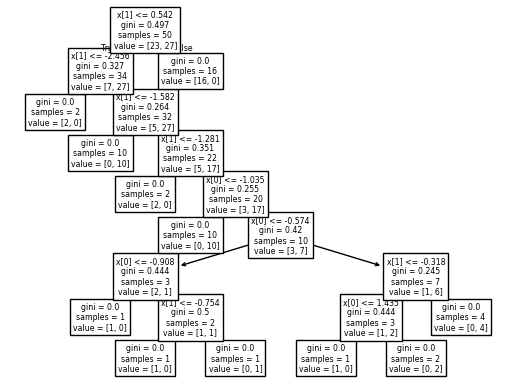

In [21]:
plot_tree(clf2)

[Text(0.6166666666666667, 0.9375, 'x[1] <= 0.542\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.43333333333333335, 0.8125, 'x[1] <= -0.519\ngini = 0.422\nsamples = 33\nvalue = [10, 23]'),
 Text(0.525, 0.875, 'True  '),
 Text(0.26666666666666666, 0.6875, 'x[0] <= -1.895\ngini = 0.33\nsamples = 24\nvalue = [5, 19]'),
 Text(0.13333333333333333, 0.5625, 'x[0] <= -2.821\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(0.06666666666666667, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.2, 0.4375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4, 0.5625, 'x[1] <= -1.582\ngini = 0.255\nsamples = 20\nvalue = [3, 17]'),
 Text(0.3333333333333333, 0.4375, 'gini = 0.0\nsamples = 10\nvalue = [0, 10]'),
 Text(0.4666666666666667, 0.4375, 'x[1] <= -1.063\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.3125, 'x[1] <= -1.261\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.3333333333333333, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4666666666

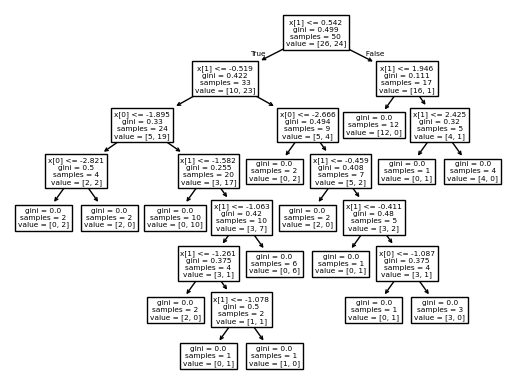

In [22]:
plot_tree(clf3)

In [23]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [25]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

d:\Matchine_Learning\0_instruction\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [26]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
77,-2.193069,0.407868,3.511052,3.255791,1.851165,0
55,-0.577778,0.260790,0.516448,2.979905,-0.421073,0
56,-1.700279,0.548944,-0.826493,-0.366761,2.040801,1
42,-2.478312,0.657627,1.184682,2.882373,-0.537750,0
2,1.374704,-0.023916,-1.493533,-1.124045,-1.557422,0
85,-1.000124,1.123629,1.146394,1.038110,1.259728,0
68,0.226509,1.337504,-0.674554,1.509559,0.854362,0
9,-2.256851,1.638065,2.321413,2.111097,-0.621779,0
49,-5.447169,2.380745,-1.803130,-1.331724,-0.917442,1
76,0.729350,0.789616,-0.318407,-0.802477,-2.101426,1
